# Quickstart

## #Scikit-Learn大表: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Loading an example dataset: datasets.load_資料名稱()

In [34]:
from sklearn import datasets
iris = datasets.load_iris() #字典形式儲存資料
digits = datasets.load_digits() #字典形式儲存資料

In [37]:
type(iris)

sklearn.utils.Bunch

In [36]:
iris.keys() #用字典形式儲存的資料

dict_keys(['target', 'data', 'target_names', 'feature_names', 'DESCR'])

In [9]:
iris.data[:5] #每個sample有4個feature

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [40]:
iris.data.shape

(150, 4)

In [10]:
iris.target[:5] #每個sample有1個label

array([0, 0, 0, 0, 0])

In [38]:
digits.keys()

dict_keys(['target', 'images', 'data', 'DESCR', 'target_names'])

In [39]:
digits.data[:2] #每sample(row)包含8x8=64個pixel

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

In [4]:
digits.data.shape

(1797, 64)

In [12]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [6]:
digits.target.shape

(1797,)

In [13]:
digits.images[0] #第一個sample(row)的8x8=64個pixel

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

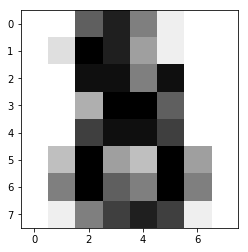

In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 

## Learning and predicting: clf = method(params), clf.predict(feature數組)

In [14]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.) #clf表示classifier, 記得幫model放上參數

In [15]:
clf.fit(digits.data[:-1], digits.target[:-1]) #除了最後一個之外，通通拿來training

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.predict(digits.data[-1:]) #拿訓練好的model來預測最後一個數組

array([8])

## Model persistence: joblib

In [42]:
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = svm.SVC()
clf.fit(X, y) #train

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
import pickle
from sklearn.externals import joblib
joblib.dump(clf, 'intro.pkl') #儲存成binary的pickle檔案
clf = joblib.load('intro.pkl') #讀取binary的pickle檔案
clf.predict(X[0:1])

array([0])

In [23]:
y[0]

0

## Conventions: regression --> float64

In [26]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [27]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype #返回float64

dtype('float64')

In [28]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [30]:
clf.fit(iris.data, iris.target_names[iris.target])  #回推到名字

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
list(clf.predict(iris.data[:3]))  

['setosa', 'setosa', 'setosa']

### Refitting and updating parameters: clf.set_params(kernel='')

In [33]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)   # np.binomial(n,p, size) ，每回丟n次，測試size回數
X_test = rng.rand(5, 10)

In [34]:
clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [36]:
clf.set_params(kernel='rbf').fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

### Multiclass vs. multilabel fitting

In [40]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

### LabelBinarizer().fit_transform(y)，類似onehot encoding

In [42]:
y = LabelBinarizer().fit_transform(y)
y # 00112的onehot encoding

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [43]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

### MultiLabelBinarizer().fit_transform(y)

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X) #使用0和1表示一串數組

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

# Supervised learning: Classification / Regression

## k-Nearest neighbors classifier: knn = KNeighborsClassifier()

In [48]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y) #只會有0,1,2三種結果，就是pure python的set()

array([0, 1, 2])

### 手動洗牌 indices = np.random.permutation(len(iris_X))，然後直接用indices指定data位置

In [49]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X)) 
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

In [54]:
iris_X_train[0:5]

array([[ 5.8,  2.8,  5.1,  2.4],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 7.3,  2.9,  6.3,  1.8],
       [ 5. ,  3.4,  1.5,  0.2]])

In [55]:
iris_y_train[0:5]

array([2, 1, 0, 2, 0])

In [50]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [52]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Linear model: from regression to sparsity

In [56]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [58]:
diabetes_X_train[0] #影響糖尿病的因子

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [59]:
diabetes_y_train[0]

151.0

### Linear regression

In [60]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [62]:
# The mean square error:  np.mean((y_hat-y)**2)
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898211

In [63]:
# Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between X and y.
# 相關係數
regr.score(diabetes_X_test, diabetes_y_test) 

0.58507530226905735

### Shrinkage: 可以讓數組樣本少時，變化不會太大 ex. Ridge(alpha=.1)

In [64]:
X = np.c_[ .5, 1].T   # np.c_ : 可以想像成就是橫向的concatenation
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

In [68]:
import matplotlib.pyplot as plt 
plt.figure() 

### 用for迴圈重現每一次訓練畫出來的regression line，可以發現用一般的OLS受到noise影響很大

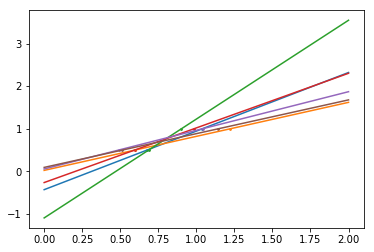

In [69]:
np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X  #this_X = 用noise干擾X
    regr.fit(this_X, y) #訓練一次
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  

### linear_model.Ridge(alpha=.1)，受到noise影響小很多

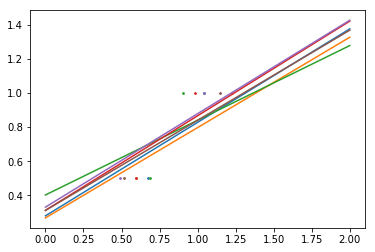

In [70]:
regr = linear_model.Ridge(alpha=.1)
plt.figure() 

np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3) 

In [73]:
alphas = np.logspace(-4, -1, 6) 
#np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)

from __future__ import print_function

#使用原本的dataset來試試看shrinkage，發現效果差不多穩定
print([regr.set_params(alpha=alpha
        ).fit(diabetes_X_train, diabetes_y_train,
        ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.58511910691622293, 0.58524713649060489, 0.58571895391793549, 0.58730094854527415, 0.58876224183092607, 0.5828450029681681]


### Sparsity: linear_model.Lasso()  (least absolute shrinkage and selection operator), LassoLars

In [74]:
alphas = np.logspace(-4, -1, 6) 

regr = linear_model.Lasso()

scores = [regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train
            ).score(diabetes_X_test, diabetes_y_test)
            for alpha in alphas]

best_alpha = alphas[scores.index(max(scores))] #得最高分score的alpha取出來使用

regr.alpha = best_alpha #把best_alpha帶入模型的regr.alpha

regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


### Classification: linear_model.LogisticRegression (區分0和1的Sigmoid function）

In [76]:
logistic = linear_model.LogisticRegression(C=1e5) #C越大，代表regularization越小！
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [78]:
logistic.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [79]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Support vector machines (SVMs)

### Linear SVM (提醒：訓練前資料最好先標準化)

In [80]:
# C越大，表示margin可以越大，越soft (less regularization)

from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train) 

# Normalizing data: For many estimators, including the SVMs, 
# having datasets with unit standard deviation for each feature is important to get good prediction.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Using kernels

### rbf

In [82]:
svc = svm.SVC(kernel='rbf') # Radial Basis Function
svc.fit(iris_X_train, iris_y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### poly, deg=3

In [84]:
svc = svm.SVC(kernel='poly',degree=3) #用三次方程式去劃分界線
svc.fit(iris_X_train, iris_y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model selection: choosing estimators and their parameters

### model.fit(train_X, train_y).score(test_X, test_y):  score越高越好，越fit

In [47]:
from sklearn import datasets, svm

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

## K-fold cross-validation: 切成K等份，每次取K-1份訓練，1份測試，交互驗證

In [48]:
#土法煉鋼for迴圈示範
import numpy as np
X_folds = np.array_split(X_digits, 3) # np.array_split(,3) 分成3等份
y_folds = np.array_split(y_digits, 3)
scores = list()

for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k) #打掉第k份
    X_train = np.concatenate(X_train) #組裝剩下的k-1分
    
    y_train = list(y_folds)
    y_test  = y_train.pop(k) #打掉第k份
    y_train = np.concatenate(y_train) #組裝剩下的k-1分
    
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


In [49]:
X_folds #分成三等份

[array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   5., ...,  16.,  11.,   2.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  12.,   0.,   0.]]),
 array([[  0.,   0.,   1., ...,  16.,  16.,   8.],
        [  0.,   0.,  10., ...,  16.,  16.,   9.],
        [  0.,   0.,   6., ...,  16.,  15.,   3.],
        ..., 
        [  0.,   1.,  13., ...,   0.,   0.,   0.],
        [  0.,   1.,   7., ...,  12.,   2.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   7., ...,   8.,   0.,   0.],
        [  0.,   0.,  12., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]])]

## Cross-validation generators

In [50]:
from sklearn.model_selection import KFold, cross_val_score

X = ["a", "a", "b", "c", "c", "c"]

#定義切法
k_fold = KFold(n_splits=3) #針對indices做區分，不看內容物。6個就6/3=2，切出2份來當test

for train_indices, test_indices in k_fold.split(X): 
     print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [51]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]  
#這裡的train跟test都是被split出來的indicies，可以直接套用

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

### cross_val_score

In [93]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1) #n_job=-1代表全部的CPU都可以用來工作

array([ 0.93489149,  0.95659432,  0.93989983])

### K-Fold: 分離1份test，用剩下k-1份train。 GroupKFold: test跟train不要重複到。 ShuffleSplit：使用亂數排列做split

## Grid-search： 算出cross validation不同參數的score，用最好的score回推最好的參數

### GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)，用dict放入Cs的範圍

In [94]:
from sklearn.model_selection import GridSearchCV, cross_val_score

Cs = np.logspace(-6, -1, 10) #生出一堆Cs來準備做測試
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)

clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### clf.best\_score_ , clf.best\_estimator\_.C

In [95]:
clf.best_score_

0.92500000000000004

In [96]:
clf.best_estimator_.C #最好的C就是這個

0.0077426368268112772

In [97]:
# Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])

0.94353826850690092

## Cross-validated estimators，直接從CV中尋找最佳參數

In [98]:
from sklearn import linear_model, datasets

lasso = linear_model.LassoCV()

diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [99]:
# The estimator chose automatically its lambda:
lasso.alpha_ 

0.012291895087486173

# Unsupervised learning

## Clustering: grouping observations together

### K-means clustering: cluster.KMeans(n_clusters=n) 需要自己定義n_cluster其實就是極大的缺點，會有bias

In [100]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
print(k_means.labels_[::10])
print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


## Decompositions: from a signal to components and loadings

### Principal component analysis(PCA):  decomposition.PCA()

In [103]:
# Create a signal with only 2 useful dimensions
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

In [104]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### pca.explained\_variance_

In [105]:
print(pca.explained_variance_) #數值越大表示越有意義，在這個例子裡面只有第一個和第二個有

[  3.11549391e+00   7.75511688e-01   2.72934634e-32]


In [106]:
# As we can see, only the 2 first components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

### Independent Component Analysis(ICA)

In [53]:
# Generate sample data
import numpy as np
from scipy import signal

time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [60]:
S[0:5]

array([[-0.34872365, -0.16210142, -0.97016788],
       [ 0.12902947,  0.76494681, -1.64656013],
       [ 0.04504643,  0.99723589, -2.14938717],
       [ 0.07012846,  1.23127992, -1.69530153],
       [-0.2852701 ,  0.85369007, -2.23975455]])

In [59]:
S.shape

(2000, 3)

In [54]:
A

array([[ 1. ,  1. ,  1. ],
       [ 0.5,  2. ,  1. ],
       [ 1.5,  1. ,  2. ]])

In [58]:
X[0:5]

array([[-1.48099296, -1.46873256, -2.62552267],
       [-0.75258385, -0.05215177, -2.33462924],
       [-1.10710485, -0.13239217, -3.2339688 ],
       [-0.39389316,  0.80232253, -2.05413046],
       [-1.67133458, -0.67500947, -4.05372418]])

In [56]:
X.shape

(2000, 3)

### decomposition.FastICA() : 沒有很理解QQ

In [108]:
# Compute ICA
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)

True

# Putting it all together

## Pipelining

### pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

### estimator = GridSearchCV(pipe, dict(pca\__n_components=n_components, logistic\__C=Cs))

### estimator.best\_estimator\_.named\_steps['pca'].n_components : 最好的n\_components參數

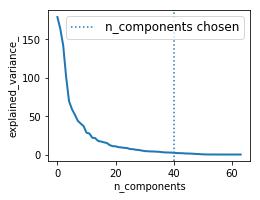

In [109]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Pipelining:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])  #先做pca在做logistic

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names: 使用__分隔出參數的名稱
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))

estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen') #選取的最好數字畫上垂直線
plt.legend(prop=dict(size=12))
plt.show()

# Working With Text Data

## Loading the 20 newsgroups dataset

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'] #選4個種類就好

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [62]:
twenty_train.keys()

dict_keys(['description', 'data', 'filenames', 'target_names', 'target', 'DESCR'])

In [65]:
np.unique(twenty_train.target)

array([0, 1, 2, 3])

In [67]:
twenty_train.target[0:5] #target就是文字標籤的indices

array([1, 1, 3, 3, 3])

In [4]:
twenty_train.target_names #target_names是真正的文字

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [5]:
len(twenty_train.data)

2257

In [6]:
len(twenty_train.filenames)

2257

In [7]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [63]:
print(twenty_train.target[0])

1


In [8]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [9]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


## Extracting features from text files (high-dimensional sparse datasets)

### Tokenizer: count_vect = CountVectorizer(), count_vect.fit_transform(twenty_train.data)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

#### count\_vect.vocabulary\_.get

In [11]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [68]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### From occurrences to frequencies

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [13]:
X_train_tf[0]

<1x35788 sparse matrix of type '<class 'numpy.float64'>'
	with 73 stored elements in Compressed Sparse Row format>

In [14]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [15]:
X_train_tfidf[0]

<1x35788 sparse matrix of type '<class 'numpy.float64'>'
	with 73 stored elements in Compressed Sparse Row format>

## Training a classifier: clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [17]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [18]:
predicted = clf.predict(X_new_tfidf)

In [19]:
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


## Building a pipeline: vect --> tfidf --> clf

In [20]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

In [21]:
text_clf.fit(twenty_train.data, twenty_train.target)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Evaluation of the performance on the test set

In [22]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.83488681757656458

In [23]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42,
                                           max_iter=5, tol=None)), 
                    ])

text_clf.fit(twenty_train.data, twenty_train.target)  

predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target) 

0.9127829560585885

### metrics.classification_report

In [24]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.81      0.87       319
         comp.graphics       0.88      0.97      0.92       389
               sci.med       0.94      0.90      0.92       396
soc.religion.christian       0.90      0.95      0.93       398

           avg / total       0.92      0.91      0.91      1502



### metrics.confusion_matrix

In [25]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[258,  11,  15,  35],
       [  4, 379,   3,   3],
       [  5,  33, 355,   3],
       [  5,  10,   4, 379]])

## Parameter tuning using grid search

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}

In [27]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [29]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [30]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

In [31]:
gs_clf.best_score_

0.90000000000000002

In [32]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)
